# Basic operation on single stock

In [1]:
from datetime import datetime
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
sns.set()

## 1. Retrieve data from Yahoo Finance

In [2]:
name = 'AAPL'
ticker = [name]
start = datetime(2010,1,4)
stock = pdr.get_data_yahoo(ticker, start) # default end -> today

## 2. Observe the data

In [3]:
stock.head()
# stock.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,26.601469,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,26.647457,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,26.223597,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,26.175119,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,26.349140,30.282858,30.285715,29.865715,30.042856,111902700.0


In [4]:
stock.shape

(2514, 6)

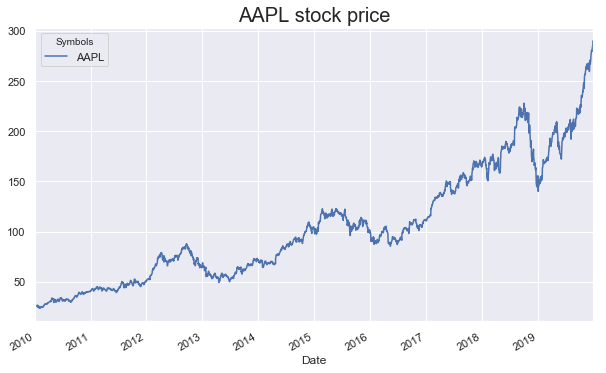

In [5]:
ax = stock['Adj Close'].plot(figsize=(10,6))
ax.set_title(name+' stock price', fontsize = 20);
# plt.savefig()

## 3. Slicing data

In [6]:
# 3 way of slicing:
# select a column the way we do to dictionary
stock['Adj Close'][:5]
# stock['Adj Close'].head()

Symbols,AAPL
Date,
2010-01-04,26.601469
2010-01-05,26.647457
2010-01-06,26.223597
2010-01-07,26.175119
2010-01-08,26.349140


In [7]:
# iloc select the row based on position
stock.iloc[368:373]
# stock.iloc[368:373, 0:2]

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2011-06-20,39.194321,45.045715,45.385715,44.357143,45.337143,160161400.0
2011-06-21,40.434834,46.471428,46.542858,45.028572,45.240002,123345600.0
2011-06-22,40.100464,46.087143,46.985714,46.054287,46.451427,97645800.0
2011-06-23,41.171936,47.318573,47.384285,45.445713,45.562859,139939800.0
2011-06-24,40.565350,46.621429,47.592857,46.441429,47.338570,109951800.0


In [8]:
# loc select the row based on label
row1 = datetime(2011,6,20)
row2 = datetime(2011,6,24)
stock.loc[row1:row2]
# stock.loc[row1:row2,'Adj Close':'Close']

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2011-06-20,39.194321,45.045715,45.385715,44.357143,45.337143,160161400.0
2011-06-21,40.434834,46.471428,46.542858,45.028572,45.240002,123345600.0
2011-06-22,40.100464,46.087143,46.985714,46.054287,46.451427,97645800.0
2011-06-23,41.171936,47.318573,47.384285,45.445713,45.562859,139939800.0
2011-06-24,40.565350,46.621429,47.592857,46.441429,47.338570,109951800.0


In [9]:
# Using function to slice is not the same as head() or tail()
# When slicing results are assigned new values, the original ones change
# But head() or tail() will create new DataFrame, assign new value to that one will not affect the original one

a = stock.head(4)
a['Open'] = 1
b = stock['Volume'][:4]
b[:] = 1
stock.head()

D:\Apps\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,26.601469,30.572857,30.642857,30.340000,30.490000,1.0
2010-01-05,26.647457,30.625713,30.798571,30.464285,30.657143,1.0
2010-01-06,26.223597,30.138571,30.747143,30.107143,30.625713,1.0
2010-01-07,26.175119,30.082857,30.285715,29.864286,30.250000,1.0
2010-01-08,26.349140,30.282858,30.285715,29.865715,30.042856,111902700.0


## 4. Candlestick

In [10]:
# open conda prompt, type: pip install mpl_finance
from mpl_finance import candlestick_ohlc

In [11]:
num = len(stock.resample('BM').last())
date = list(range(1, num+1))
stock_m = pd.DataFrame(date, columns=['Date'])
stock_m['Open'] = stock['Open'].resample('BM').first().values
stock_m['High'] = stock['High'].resample('BM').max().values
stock_m['Low'] = stock['Low'].resample('BM').min().values
stock_m['Close'] = stock['Close'].resample('BM').last().values

In [12]:
stock_m.iloc[-50:]

,Date,Open,High,Low,Close
70,71,120.800003,123.820000,111.000000,118.300003
71,72,118.750000,119.860001,104.820000,105.260002
72,73,102.610001,105.849998,92.389999,97.339996
73,74,96.470001,98.889999,92.589996,96.690002
74,75,97.650002,110.419998,97.419998,108.989998
75,76,108.779999,112.389999,92.510002,93.739998
76,77,93.970001,100.730003,89.470001,99.860001
77,78,99.019997,101.889999,91.500000,95.599998
78,79,95.489998,104.550003,94.370003,104.209999
79,80,104.410004,110.230003,104.000000,106.099998


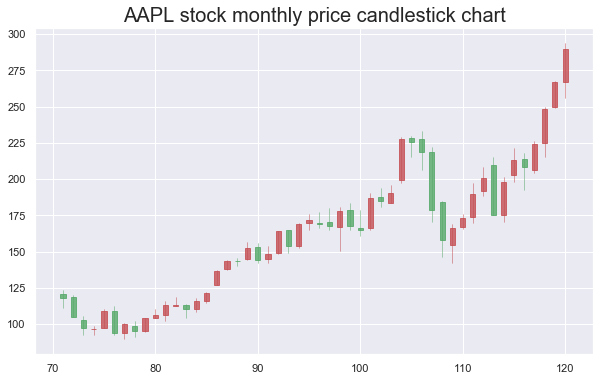

In [13]:
fig, ax1 = plt.subplots(figsize=(10,6))
candlestick_ohlc(ax1, stock_m.values[-50:], width = 0.5, colorup = 'r', colordown = 'g', alpha = 0.8);
ax1.set_title(name+' stock monthly price candlestick chart', fontsize = 20);

## 5. Rolling Statistic

In [14]:
sma = stock['Close'].copy() 
sma['SMA2M'] = stock['Close'].rolling(window = 42).mean()
sma['SMA1Y'] = stock['Close'].rolling(window = 252).mean()

In [15]:
# sma[sma.isna().any(axis=1)]
sma

Symbols,AAPL,SMA2M,SMA1Y
Date,,,
2010-01-04,30.572857,NaN,NaN
2010-01-05,30.625713,NaN,NaN
2010-01-06,30.138571,NaN,NaN
2010-01-07,30.082857,NaN,NaN
2010-01-08,30.282858,NaN,NaN
...,...,...,...
2019-12-20,279.440002,262.904762,205.048413
2019-12-23,284.000000,263.876667,205.577262
2019-12-24,284.269989,264.845476,206.122659


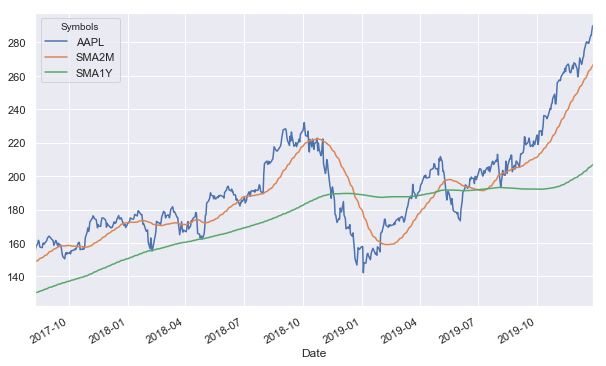

In [16]:
sma.iloc[-600:].plot(figsize=(10,6));

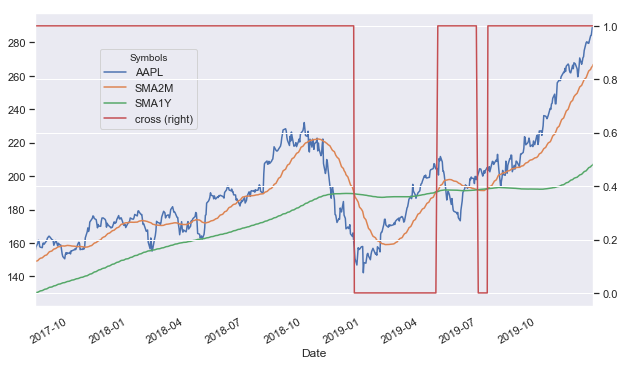

In [17]:
# death cross and gold cross
sma['cross'] = np.where(sma['SMA2M']>sma['SMA1Y'], 1, 0)
ax = sma.iloc[-600:].plot(figsize = (10,6), secondary_y='cross')
ax.get_legend().set_bbox_to_anchor((0.3,0.895)); # set the location for legend

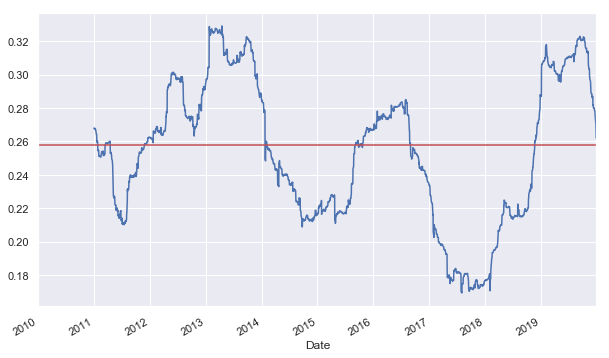

In [18]:
# historical vol
sma['ret'] = sma[ticker] / sma[ticker].shift() - 1
sma['vol1Y'] = sma['ret'].rolling(window = 252).std() * np.sqrt(252)

ax = sma['vol1Y'].plot(figsize=(10,6))
ax.axhline(sma['ret'].std() * np.sqrt(252) , c = 'r');

## 6. Fundamental data

In [20]:
import yfinance as yf
import pandas as pd

In [16]:
tencent = yf.Ticker("0700.HK") 
type(tencent)

yfinance.ticker.Ticker

In [29]:
print("Market Capitalization:", tencent.info['marketCap'])
print("PB ratio: ", tencent.info['priceToBook'])
print("trailing PE: ", tencent.info['trailingPE'])
print("forward PE:", tencent.info['forwardPE'])
print("Dividend Yield:", tencent.info['dividendYield'])
# print(tencent.info['bookValue'])

Market Capitalization: 3668071940096
PB ratio:  75.94936
trailing PE:  40.457806
forward PE: 35.10055
Dividend Yield: 0.0026


In [30]:
# Either use period parameter or use start and end
# Valid period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
tencent.history(period = '1y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,314,314,305,305,15721297,0,0
2019-01-03,303,308,301,304,16420034,0,0
2019-01-04,299,310,299,309,19329055,0,0
2019-01-07,317,317,312,316,24890962,0,0
2019-01-08,317,317,311,314,16264928,0,0
...,...,...,...,...,...,...,...
2019-12-24,379,379,376,376,6360485,0,0
2019-12-27,378,385,378,384,19180036,0,0
2019-12-30,381,384,381,383,14328612,0,0


In [31]:
tencent.actions # the period depend on history
# tencent.dividends
# tencent.splits

,Dividends,Stock Splits
Date,,
2019-05-17,1,0


In [23]:
pd.set_option('display.float_format', lambda x: '%d' % x)
tencent.financials
# tencent.cashflow
# tencent.balancesheet

,2018-12-31,2017-12-31,2016-12-31,2015-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,94466000000,88215000000,51640000000,36216000000
Minority Interest,32697000000,21019000000,11623000000,2065000000
Net Income,78719000000,71510000000,41095000000,28806000000
Selling General Administrative,65755000000,50703000000,34595000000,24818000000
Gross Profit,142120000000,116925000000,84499000000,61232000000
Ebit,79820000000,73925000000,50778000000,36587000000
Operating Income,79820000000,73925000000,50778000000,36587000000
Other Operating Expenses,-3455000000,-7703000000,-874000000,-173000000


In [28]:
tencent.financials.loc['Net Income']


2018-12-31   78719000000
2017-12-31   71510000000
2016-12-31   41095000000
2015-12-31   28806000000
Name: Net Income, dtype: object

In [11]:
tencent.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2018-11-15,Barclays,Overweight,Overweight,main
2019-03-22,Barclays,Overweight,Overweight,main
2019-08-05,Jefferies,Buy,,init
2019-11-15,Barclays,Overweight,,main
2019-11-22,Macquarie,Outperform,,init
